# Web Scraping

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Read the Excel file
path_to_excel_file = 'Input.xlsx'
df = pd.read_excel(path_to_excel_file)

In [2]:
df

,URL_ID,URL
0,37,https://insights.blackcoffer.com/ai-in-healthc...
1,38,https://insights.blackcoffer.com/what-if-the-c...
2,39,https://insights.blackcoffer.com/what-jobs-wil...
3,40,https://insights.blackcoffer.com/will-machine-...
4,41,https://insights.blackcoffer.com/will-ai-repla...
...,...,...
109,146,https://insights.blackcoffer.com/blockchain-fo...
110,147,https://insights.blackcoffer.com/the-future-of...
111,148,https://insights.blackcoffer.com/big-data-anal...
112,149,https://insights.blackcoffer.com/business-anal...


#### First iteration

In [3]:
webpage=requests.get("https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/").text

In [4]:
soup= BeautifulSoup(webpage)

In [5]:
content = soup.find_all('p',class_=None)

In [6]:
content

[<p><strong>Introduction</strong></p>,
 <p>“If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research.</p>,
 <p>After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large 

#### Second iteration

'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>What if the Creation is Taking Over the Creator? | Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Feed" href="https://insights.blackcoffer.com/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Blackcoffer Insights &raquo; Comments Feed" href="https://insights.blackcoffer.com/comments/feed/" />\n<script type="text/javascript">\nwindow._wpemojiSettings = {"base
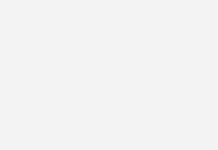
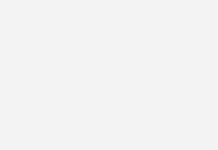
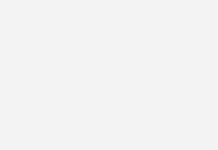
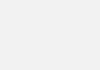
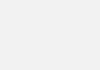
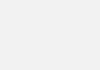
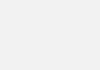
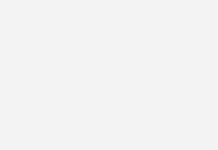
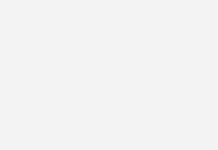
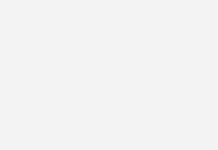
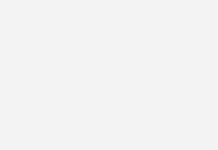

In [7]:
webpage2=requests.get("https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/").text
webpage2

In [8]:
soup2 = BeautifulSoup(webpage2)

In [9]:
content2 = soup2.find_all('p',class_=None)

In [10]:
content2

[<p>Human minds, a fascination in itself carrying the potential of tinkering nature with the pixie dust intelligence, creating and solving the mysteries and wonders with anything but admiration. However, no matter how captivating a human mind can be, it could sometimes be appalled. It could be the hunger or maybe the desire to want more, to go beyond and unravel the limitations, or maybe something like pure greed. Humans have never stopped and always keep evolving when it comes to intelligence and this is what makes them the supreme.</p>,
 <p>Intelligence calls out for supremacy and so, what if there was to evolve something that opposed a challenge to the very human minds, to their capabilities while making them question their own importance among themselves? Artificial Intelligence came as a revolution, havoc when it first came to the light. The concept of making machines does work on their own, like granting machines –The Intelligence.</p>,
 <p>The idea of making machines work like h

In [11]:
title_l=[]
title = soup2.find("h1",class_='tdb-title-text')
if title is not None:
    print(title.text)

#### Web Scraping final function

In [12]:
content_list=[]
for i in range(114):
    url=df['URL'][i]
    webpage = requests.get(url).text
    soup= BeautifulSoup(webpage)
    content = soup.find_all('p',class_=None)
    content_list.append(content)
df['content']=content_list
df

In [13]:
df_1=df.drop("URL",axis=1)

In [14]:
df_1.to_csv("URL_ID with content",index=False)

# Preprocessing

In [1]:
import pandas as pd 
df_1=pd.read_csv("URL_ID with content")

In [2]:
df_1['content']=df_1['content'].apply(str)

In [3]:
f = open("stopwords.txt",'r')
stopwords=f.read()

In [4]:
stopwords=stopwords.lower()

In [5]:
stopwords

"about\nabove\nafter\nagain\nall\nam\namong\nan\nand\nany\nare\nas\nat\nbe\nbecause\nbeen\nbefore\nbeing\nbelow\nbetween\nboth\nbut\nby\ncan\ndid\ndo\ndoes\ndoing\ndown\nduring\neach\nfew\nfor\nfrom\nfurther\nhad\nhas\nhave\nhaving\nhe\nher\nhere\nhers\nherself\nhim\nhimself\nhis\nhow\nif\nin\ninto\nis\nit\nits\nitself\njust\nme\nmore\nmost\nmy\nmyself\nno\nnor\nnot\nnow\nof\noff\non\nonce\nonly\nor\nother\nour\nours\nourselves\nout\nover\nown\nsame\nshe\nshould\nso\nsome\nsuch\nthan\nthat\nthe\ntheir\ntheirs\nthem\nthemselves\nthen\nthere\nthese\nthey\nthis\nthose\nthrough\nto\ntoo\nunder\nuntil\nup\nvery\nwas\nwe\nwere\nwhat\nwhen\nwhere\nwhich\nwhile\nwho\nwhom\nwhy\nwith\nyou\nyour\nyours\nyourself\nyourselves\nsmith  | surnames from 1990 census > .002%.  www.census.gov.genealogy/names/dist.all.last\njohnson\nwilliams\njones\nbrown\ndavis\nmiller\nwilson\nmoore\ntaylor\nanderson\nthomas\njackson\nwhite\nharris\nmartin\nthompson\ngarcia\nmartinez\nrobinson\nclark\nrodriguez\nlewis\n

In [6]:
df_2=df_1.copy()
df_2['content']=df_2['content'].apply(str)
df_2

,URL_ID,content
0,37,"[<p><strong>Introduction</strong></p>, <p>“If ..."
1,38,"[<p>Human minds, a fascination in itself carry..."
2,39,"[<p><strong>Introduction</strong></p>, <p>AI i..."
3,40,[<p>“Anything that could give rise to smarter-...
4,41,[<p>“Machine intelligence is the last inventio...
...,...,...
109,146,[<p><em>Reconciling with the financial realiti...
110,147,[<p>An investment is a resource or thing procu...
111,148,[<p>Quality and affordable healthcare is a vis...
112,149,[<p>Analytics is a statistical scientific proc...


In [7]:
from bs4 import BeautifulSoup
def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()

    text = text.lower()
    text = text.split()
    y=[]
    for i in text:
        if i not in stopwords:
            y.append(i)  
            
    return " ".join(y)

In [8]:
import string
def transform_text(text):
    text = text.lower()
    text = text.split()
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
                
    return " ".join(y)

In [9]:
df_1['content']=df_1['content'].apply(transform_text)

In [10]:
len(df_1['content'][0].split())

670

In [29]:
df_2['content']=df_2['content'].apply(clean_text)

# Analysis

#### Positive score

In [11]:
p = open("positive.txt",'r')
positive_words=p.read()

In [12]:
def pos_score_calc(sentence):    
    positive_score=0
    sentence=sentence.split(" ")
    for word in sentence:
        if word in positive_words:
            positive_score+=1
    return positive_score

In [13]:
sent=df_1['content'][0]

In [14]:
pos_score_calc(sent)

75

#### Negative Score

In [15]:
q = open("negative.txt",'r')
negative_words=q.read()

In [16]:
def neg_score_calc(sentence):    
    negative_score=0
    sentence=sentence.split(" ")
    for word in sentence:
        if word in negative_words:
            negative_score-=1
    negative_score=negative_score*(-1)
    return negative_score

In [17]:
neg_score_calc(sent)

107

In [18]:
df_1['Positive Score']=df_1['content'].apply(pos_score_calc)

In [19]:
df_1['Negative Score']=df_1['content'].apply(neg_score_calc)

In [20]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score
0,37,kills 10 highly infectious virus missiles rema...,75,107
1,38,fascination carrying potential tinkering natur...,58,60
2,39,rapidly evolving employment matters involving ...,86,90
3,40,intelligence artificial intelligence enhanceme...,77,68
4,41,intelligence invention humanity artificial int...,74,62


#### Polarity Score

In [21]:
df_1['Polarity Score'] = (df_1['Positive Score'] - df_1['Negative Score']) / ((df_1['Positive Score'] + df_1['Negative Score']) + 0.000001)

In [22]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069
4,41,intelligence invention humanity artificial int...,74,62,0.088235


In [23]:
df_1.describe()

,URL_ID,Positive Score,Negative Score,Polarity Score
count,114.000000,114.000000,114.000000,114.000000
mean,93.500000,39.587719,54.157895,-0.153704
std,33.052988,24.829618,31.994629,0.182736
min,37.000000,1.000000,1.000000,-0.800000
25%,65.250000,22.250000,30.000000,-0.268707
50%,93.500000,36.500000,54.000000,-0.159863
75%,121.750000,53.000000,78.000000,-0.024398
max,150.000000,108.000000,131.000000,0.368421


#### Subjectivity Score

In [24]:
len(df_1['content'][0].split(" "))

670

In [25]:
df_1['Subjectivity Score'] = (df_1['Positive Score']+df_1['Negative Score'])/(len(df_1['content'])+0.000001)

In [27]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069,1.271930
4,41,intelligence invention humanity artificial int...,74,62,0.088235,1.192982


#### Sentence length

In [30]:
import nltk 
words=nltk.word_tokenize(df_2['content'][0])
sentences=nltk.sent_tokenize(df_2['content'][0])
round(len(words)/len(sentences),2)

21.88

In [31]:
def sentence_len(text):
    words=nltk.word_tokenize(text)
    sentences=nltk.sent_tokenize(text)
    length=round(len(words)/len(sentences))
    return length

In [32]:
df_1['Average sentence length']=df_2['content'].apply(sentence_len)

In [33]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860,15
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069,1.271930,10
4,41,intelligence invention humanity artificial int...,74,62,0.088235,1.192982,14


#### Complex words

In [38]:
import nltk

def calculate_complexword_count_percentage(sentence):
    words = nltk.word_tokenize(sentence)
    cmu_dict = nltk.corpus.cmudict.dict()
    count = 0
    for word in words:
        syllables = cmu_dict.get(word.lower())
        if syllables:
            syllable_length = len([s for s in syllables[0] if s[-1].isdigit()])
            if syllable_length > 2:
                count += 1
    if len(words)!=0:
        return round(count/len(words)*100,2)
    else:
        return 0

In [39]:
df_1['Complex word %']=df_1['content'].apply(calculate_complexword_count_percentage)

In [40]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22,45.22
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12,35.87
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860,15,47.92
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069,1.271930,10,44.85
4,41,intelligence invention humanity artificial int...,74,62,0.088235,1.192982,14,48.09


#### Fog Index

In [41]:
df_1['Fog Index']=  round(0.4*(df_1['Average sentence length']+df_1['Complex word %']),2)

In [42]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %,Fog Index
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22,45.22,26.89
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12,35.87,19.15
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860,15,47.92,25.17
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069,1.271930,10,44.85,21.94
4,41,intelligence invention humanity artificial int...,74,62,0.088235,1.192982,14,48.09,24.84


In [43]:
df_1['Average no. of words per sentence']=df_1['Average sentence length']

#### Complex word count

In [44]:
import nltk

def calculate_complexword_count(sentence):
    words = nltk.word_tokenize(sentence)
    cmu_dict = nltk.corpus.cmudict.dict()
    count = 0
    for word in words:
        syllables = cmu_dict.get(word.lower())
        if syllables:
            syllable_length = len([s for s in syllables[0] if s[-1].isdigit()])
            if syllable_length > 2:
                count += 1
    return count

In [45]:
df_1['Complex word count']=df_1['content'].apply(calculate_complexword_count)

In [47]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %,Fog Index,Average no. of words per sentence,Complex word count
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22,45.22,26.89,22,303
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12,35.87,19.15,12,113
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860,15,47.92,25.17,15,265
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069,1.271930,10,44.85,21.94,10,170
4,41,intelligence invention humanity artificial int...,74,62,0.088235,1.192982,14,48.09,24.84,14,227


#### Word Count

In [49]:
words=[]
for i in range(0,114):
    words.append(len(df_1['content'][i].split()))

In [50]:
df_1['Word Count']=words

In [52]:
df_1.head()

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %,Fog Index,Average no. of words per sentence,Complex word count,Word Count
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22,45.22,26.89,22,303,670
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12,35.87,19.15,12,113,315
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860,15,47.92,25.17,15,265,553
3,40,intelligence artificial intelligence enhanceme...,77,68,0.062069,1.271930,10,44.85,21.94,10,170,379
4,41,intelligence invention humanity artificial int...,74,62,0.088235,1.192982,14,48.09,24.84,14,227,472


#### Syllables per row

In [53]:
def syllable_count(sentence):
    words = nltk.word_tokenize(sentence)
    cmu_dict = nltk.corpus.cmudict.dict()
    count = 0
    for word in words:
        syllables = cmu_dict.get(word.lower())
        if syllables:
            syllable_length = len([s for s in syllables[0] if s[-1].isdigit()])
            if syllable_length > 0:
                count += 1
    return count

In [54]:
df_1['Syllable per word']=df_1['content'].apply(syllable_count)

In [55]:
df_1.head(2)

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %,Fog Index,Average no. of words per sentence,Complex word count,Word Count,Syllable per word
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22,45.22,26.89,22,303,670,640
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12,35.87,19.15,12,113,315,305


#### Personal pronouns

In [56]:
def count_personal_pronouns(text):
    personal_pronouns = set(['I', 'me', 'my', 'mine', 'myself', 'you',
    'your', 'yours', 'yourself', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'we', 'us', 'our', 'ours', 'ourselves', 'yourselves',
    'they', 'them', 'their', 'theirs', 'themselves'])
    word_tokens = nltk.word_tokenize(text)
    pronoun_count = sum(1 for word in word_tokens if word.lower() in personal_pronouns)
    return pronoun_count

In [60]:
df_1['Personal pronouns']=df_2['content'].apply(count_personal_pronouns)

In [62]:
df_1.head(3)

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %,Fog Index,Average no. of words per sentence,Complex word count,Word Count,Syllable per word,Personal pronouns
0,37,kills 10 highly infectious virus missiles rema...,75,107,-0.175824,1.596491,22,45.22,26.89,22,303,670,640,2
1,38,fascination carrying potential tinkering natur...,58,60,-0.016949,1.035088,12,35.87,19.15,12,113,315,305,17
2,39,rapidly evolving employment matters involving ...,86,90,-0.022727,1.543860,15,47.92,25.17,15,265,553,542,6


In [63]:
len(df_1['content'][0])

5975

In [64]:
len(df_1['content'][0].split())

670

In [68]:
def avg_word_length(text):
    if len(text.split())!=0:
        return round(len(text)/len(text.split()),2)
    else:
        return 0
    

In [69]:
df_1['Average Word Length'] = df_1['content'].apply(avg_word_length)

In [70]:
df_1.sample(5)

,URL_ID,content,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average sentence length,Complex word %,Fog Index,Average no. of words per sentence,Complex word count,Word Count,Syllable per word,Personal pronouns,Average Word Length
65,102,virtual illusion attempt vindicate outline unf...,41,68,-0.247706,0.956140,12,40.38,20.95,12,128,317,309,3,8.53
44,81,financial crisis 2008 started crisis subprime ...,39,72,-0.297297,0.973684,19,30.72,19.89,19,94,306,291,0,7.93
78,115,kills 10 highly infectious virus tedx address ...,58,80,-0.159420,1.210526,20,42.38,24.95,20,214,505,449,2,8.51
103,140,verge unprecedented economic humanitarian disa...,34,75,-0.376147,0.956140,13,42.34,22.14,13,116,274,245,0,8.46
62,99,unprecedented pandemic possibility leaders act...,39,63,-0.235294,0.894737,16,50.33,26.53,16,154,306,298,3,8.92


In [71]:
df_1.to_excel("Output.xlsx",index=False)